In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statannotations


In [22]:
import pandas as pd

# 读取 Excel 文件
raw = pd.read_excel("summary.xlsx",index_col=0)

# 如果有多个 sheet，可以指定 sheet 名
# df = pd.read_excel("summary.xlsx", sheet_name="Sheet1")



In [27]:
raw

,Pt003.RIKEN01,Pt004.RIKEN01,Pt005.RIKEN01,Pt008.RIKEN01,Pt009.RIKEN01,Pt031.RIKEN02,Pt040.RIKEN02,Pt002.RIKEN01,Pt033.RIKEN02,Pt046.RIKEN02,Ave responder,SEM S,Ave nonresponder,SEM R,T-test,Fold Change
Gene,,,,,,,,,,,,,,,,
STAT3,6326.823069,9601.291649,5705.805100,10540.565570,6537.663840,7359.036336,9708.909547,12327.704990,7713.010873,9755.939693,7968.585016,732.643365,9932.218519,1335.060063,0.200228,1.246422
ABL1,3714.573644,2720.442643,3910.397580,6357.025876,3713.937394,3940.510782,3264.194333,3007.963059,2298.466380,3083.850325,3945.868893,433.386563,2796.759921,250.108016,0.139970,0.708782
gene/ABL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAT3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1.703243,3.529312,1.459137,1.658097,1.760305,1.867534,2.974366,4.098357,3.355721,3.163558,2.135999,0.298058,3.539212,0.285023,0.023190,1.656935
responder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non-responder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# 假设两组数据
responder = raw.iloc[4,:7].to_list()     # n=7
nonresponder = raw.iloc[4,7:10].to_list() # n=3
gene_name = "STAT3/ABL"

# 文件名安全化（把斜杠替换掉）
safe_name = gene_name.replace("/", "_").replace("\\", "_").replace(" ", "")


# 合并成 DataFrame
df = pd.DataFrame({
    gene_name: responder + nonresponder,
    "Group": ["Responder"]*len(responder) + ["Non-responder"]*len(nonresponder)
})

# 统计检验 (Student’s t-test 等方差假设)
stat, pval = stats.ttest_ind(responder, nonresponder, equal_var=True)
print(f"T-test p-value: {pval:.4f}")

# 保存目录
outdir = "figures"
os.makedirs(outdir, exist_ok=True)

# ---------- 箱型图 ----------
plt.figure(figsize=(6,5))
ax = sns.boxplot(data=df, x="Group", y=gene_name, showfliers=False, palette="Set2")
sns.stripplot(data=df, x="Group", y=gene_name, color="black", size=6, jitter=True, ax=ax)

# 添加 p 值
x1, x2 = 0, 1
y = df[gene_name].max() + 0.05 * df[gene_name].max()
ax.plot([x1, x1, x2, x2], [y, y*1.01, y*1.01, y], lw=1.2, color="k")
ax.text((x1+x2)/2, y*1.01, f"p={pval:.3f}", ha="center", va="bottom")

plt.title(f"{gene_name}")
plt.tight_layout()
plt.savefig(os.path.join(outdir, f"{safe_name}_boxplot.pdf"), dpi=300)
plt.close()

# ---------- 柱状图（均值±SEM） ----------
plt.figure(figsize=(6,5))
means = df.groupby("Group")[gene_name].mean()
sems = df.groupby("Group")[gene_name].sem()

ax = sns.barplot(data=df, x="Group", y=gene_name, errorbar="se", palette="Set2", capsize=.2)
sns.stripplot(data=df, x="Group", y=gene_name, color="black", size=6, jitter=True, ax=ax)

# 添加 p 值
y = max(means + sems) + 0.05 * max(means + sems)
ax.plot([0, 0, 1, 1], [y, y*1.01, y*1.01, y], lw=1.2, color="k")
ax.text(0.5, y*1.02, f"p={pval:.3f}", ha="center", va="bottom")

plt.title(f"{gene_name} expression")
plt.tight_layout()
# 保存时用 safe_name
plt.savefig(os.path.join(outdir, f"{safe_name}_barplot.pdf"), dpi=300)
plt.close()

print(f"图已保存到: {outdir}/{gene_name}_boxplot.png 和 {outdir}/{gene_name}_barplot.pdf")


T-test p-value: 0.0232


C:\Users\administration\AppData\Local\Temp\ipykernel_4396\877544591.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="Group", y=gene_name, showfliers=False, palette="Set2")
C:\Users\administration\AppData\Local\Temp\ipykernel_4396\877544591.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Group", y=gene_name, errorbar="se", palette="Set2", capsize=.2)


图已保存到: figures/STAT3/ABL_boxplot.png 和 figures/STAT3/ABL_barplot.pdf


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# 假设两组数据
responder = raw.iloc[0,:7].to_list()     # n=7
nonresponder = raw.iloc[0,7:10].to_list() # n=3
gene_name = "STAT3"

# 合并成 DataFrame
df = pd.DataFrame({
    gene_name: responder + nonresponder,
    "Group": ["Responder"]*len(responder) + ["Non-responder"]*len(nonresponder)
})

# 统计检验 (Student’s t-test 等方差假设)
stat, pval = stats.ttest_ind(responder, nonresponder, equal_var=True)
print(f"T-test p-value: {pval:.4f}")

# 保存目录
outdir = "figures"
os.makedirs(outdir, exist_ok=True)

# ---------- 箱型图 ----------
plt.figure(figsize=(6,5))
ax = sns.boxplot(data=df, x="Group", y=gene_name, showfliers=False, palette="Set2")
sns.stripplot(data=df, x="Group", y=gene_name, color="black", size=6, jitter=True, ax=ax)

# 添加 p 值
x1, x2 = 0, 1
y = df[gene_name].max() + 0.05 * df[gene_name].max()
ax.plot([x1, x1, x2, x2], [y, y*1.01, y*1.01, y], lw=1.2, color="k")
ax.text((x1+x2)/2, y*1.01, f"p={pval:.3f}", ha="center", va="bottom")

plt.title(f"{gene_name} expression")
plt.tight_layout()
plt.savefig(os.path.join(outdir, f"{gene_name}_boxplot.pdf"), dpi=300)
plt.close()

# ---------- 柱状图（均值±SEM） ----------
plt.figure(figsize=(6,5))
means = df.groupby("Group")[gene_name].mean()
sems = df.groupby("Group")[gene_name].sem()

ax = sns.barplot(data=df, x="Group", y=gene_name, errorbar="se", palette="Set2", capsize=.2)
sns.stripplot(data=df, x="Group", y=gene_name, color="black", size=6, jitter=True, ax=ax)

# 添加 p 值
y = max(means + sems) + 0.05 * max(means + sems)
ax.plot([0, 0, 1, 1], [y, y*1.01, y*1.01, y], lw=1.2, color="k")
ax.text(0.5, y*1.02, f"p={pval:.3f}", ha="center", va="bottom")

plt.title(f"{gene_name} expression")
plt.tight_layout()
plt.savefig(os.path.join(outdir, f"{gene_name}_barplot.pdf"), dpi=300)
plt.close()

print(f"图已保存到: {outdir}/{gene_name}_boxplot.png 和 {outdir}/{gene_name}_barplot.png")


T-test p-value: 0.2002


C:\Users\administration\AppData\Local\Temp\ipykernel_4396\1309504387.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="Group", y=gene_name, showfliers=False, palette="Set2")
C:\Users\administration\AppData\Local\Temp\ipykernel_4396\1309504387.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Group", y=gene_name, errorbar="se", palette="Set2", capsize=.2)


图已保存到: figures/STAT3_boxplot.png 和 figures/STAT3_barplot.png


Mann-Whitney U test p-value: 0.0232


C:\Users\administration\AppData\Local\Temp\ipykernel_4396\834948426.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="group", y="value", showfliers=False, palette="Set2")


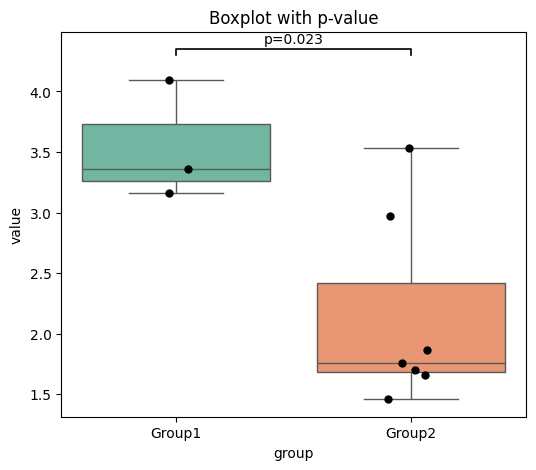

C:\Users\administration\AppData\Local\Temp\ipykernel_4396\834948426.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="group", y="value", errorbar="se", palette="Set2", capsize=.2)


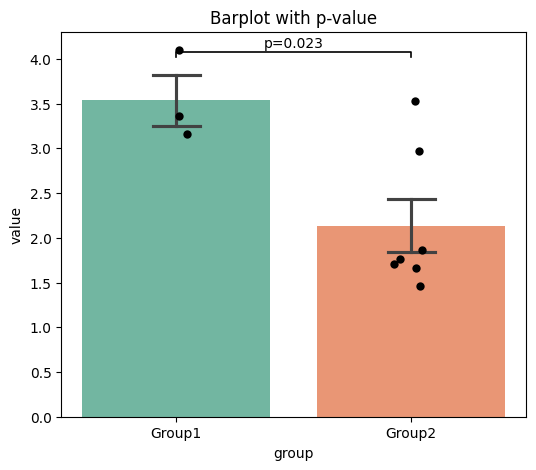

In [37]:

# 假设两组数据
group2 = raw.iloc[4,:7].to_list()  # n=3
group1 = raw.iloc[4,7:10].to_list() # n=7

# 合并成 DataFrame
df = pd.DataFrame({
    "value": group1 + group2,
    "group": ["Group1"]*len(group1) + ["Group2"]*len(group2)
})

# 统计检验 (Mann-Whitney U)
# stat, pval = stats.mannwhitneyu(group1, group2, alternative="two-sided")
stat, pval = stats.ttest_ind(group1, group2, equal_var=True)
print(f"Mann-Whitney U test p-value: {pval:.4f}")

# ---------- 箱型图 ----------
plt.figure(figsize=(6,5))
ax = sns.boxplot(data=df, x="group", y="value", showfliers=False, palette="Set2")
sns.stripplot(data=df, x="group", y="value", color="black", size=6, jitter=True, ax=ax)

# 添加 p 值
x1, x2 = 0, 1
y = df["value"].max() + 0.2
ax.plot([x1, x1, x2, x2], [y, y+0.05, y+0.05, y], lw=1.2, color="k")
ax.text((x1+x2)/2, y+0.07, f"p={pval:.3f}", ha="center", va="bottom")

plt.title("Boxplot with p-value")
plt.show()

# ---------- 柱状图（均值±SEM） ----------
plt.figure(figsize=(6,5))
means = df.groupby("group")["value"].mean()
sems = df.groupby("group")["value"].sem()

# seaborn 0.12+ 的写法
ax = sns.barplot(data=df, x="group", y="value", errorbar="se", palette="Set2", capsize=.2)
sns.stripplot(data=df, x="group", y="value", color="black", size=6, jitter=True, ax=ax)

# 添加 p 值
y = max(means + sems) + 0.2
ax.plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.2, color="k")
ax.text(0.5, y+0.07, f"p={pval:.3f}", ha="center", va="bottom")

plt.title("Barplot with p-value")
plt.show()

In [26]:
import numpy as np
from scipy import stats

# 你的数据
responder = np.array([6326.82, 9601.29, 5705.81, 10540.57, 6537.66, 7359.04, 9708.91])
nonresponder = np.array([12327.70, 7713.01, 9755.94])

# 1. 均值
mean1, mean2 = responder.mean(), nonresponder.mean()
diff = mean1 - mean2
print("Responder mean:", mean1)
print("Non-responder mean:", mean2)
print("Mean difference:", diff)

# 2. 方差 (无偏估计, ddof=1)
var1, var2 = responder.var(ddof=1), nonresponder.var(ddof=1)
print("Responder variance:", var1)
print("Non-responder variance:", var2)

# 3. 标准误差 SE
se = np.sqrt(var1/len(responder) + var2/len(nonresponder))
print("Standard Error (SE):", se)

# 4. t 值
t_value = diff / se
print("t statistic:", t_value)

# 5. Welch 自由度
df = ( (var1/len(responder) + var2/len(nonresponder))**2 ) / \
     ( (var1/len(responder))**2 / (len(responder)-1) + (var2/len(nonresponder))**2 / (len(nonresponder)-1) )
print("Degrees of freedom (Welch):", df)

# 6. 双尾 p 值
p_value = 2 * stats.t.sf(np.abs(t_value), df)
print("p-value:", p_value)

# 7. 用 scipy 内置函数对照
t_stat, p_builtin = stats.ttest_ind(responder, nonresponder, equal_var=False)
print("\n[scipy ttest_ind] t:", t_stat, "p:", p_builtin)


Responder mean: 7968.585714285715
Non-responder mean: 9932.216666666667
Mean difference: -1963.6309523809523
Responder variance: 3757366.340228571
Non-responder variance: 5347146.046433335
Standard Error (SE): 1522.875121443131
t statistic: -1.28942348898585
Degrees of freedom (Welch): 3.286632111002231
p-value: 0.28049960971390986

[scipy ttest_ind] t: -1.28942348898585 p: 0.28049960971390986


In [29]:
import numpy as np
from scipy import stats

group1 = np.array([1.703243407, 3.529312288, 1.459136823, 1.658097006,
                   1.760305343, 1.867533613, 2.974366277])
group2 = np.array([4.098356512, 3.355720554, 3.163558106])

# Welch’s t-test
t_stat, p_t = stats.ttest_ind(group1, group2, equal_var=False)

# Mann-Whitney U test
u_stat, p_u = stats.mannwhitneyu(group1, group2, alternative="two-sided")

print("Responder mean:", group1.mean())
print("Non-responder mean:", group2.mean())
print("Welch t-test: t =", t_stat, "p =", p_t)
print("Mann-Whitney U: U =", u_stat, "p =", p_u)


Responder mean: 2.135999251
Non-responder mean: 3.539211724
Welch t-test: t = -3.402526819644585 p = 0.013508403048002904
Mann-Whitney U: U = 2.0 p = 0.06666666666666667


In [30]:
import numpy as np
from scipy import stats

group1 = np.array([1.703243407, 3.529312288, 1.459136823, 1.658097006,
                   1.760305343, 1.867533613, 2.974366277])
group2 = np.array([4.098356512, 3.355720554, 3.163558106])

# Welch’s t-test (默认 equal_var=False)
t_welch, p_welch = stats.ttest_ind(group1, group2, equal_var=False)

# Student’s t-test (假设方差相等)
t_student, p_student = stats.ttest_ind(group1, group2, equal_var=True)

print("Welch’s t-test p:", p_welch)
print("Student’s t-test p:", p_student)


Welch’s t-test p: 0.013508403048002904
Student’s t-test p: 0.02319003066598849
